In [79]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.cluster import MeanShift, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics # for calculating Silhouette score
from yellowbrick.cluster import SilhouetteVisualizer

import plotly.graph_objects as ob # For data visualization
import plotly.express as px # For data visualization.


In [80]:


# Leer los datos
# Se cargan los datos. 
df_bank=pd.read_csv('BancAlpes_credit_card_data.csv', sep=';', encoding = 'utf-8', index_col=0)

In [81]:
# Miramos el número de columnas y filas
df_bank.shape

(660, 10)

In [82]:
df_bank.head()

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,,
1,87073,20000,Female,2,Married,24,2,1,1,0
2,38414,120000,Female,2,Single,26,3,0,10,9
3,17341,90000,Female,2,Single,34,7,1,3,4
4,40496,50000,Female,2,Married,37,5,1,1,?
5,47437,50000,Male,2,Married,57,6,0,12,3


In [83]:
df_testing=df_bank[df_bank['Customer']!='-']
df_testing= df_testing[df_testing['Education'] != 'ABC']
df_testing=df_testing[df_testing['Total_Credit_Cards']!='-']
df_testing=df_testing[df_testing['Total_visits_bank']!='?']
df_testing=df_testing[df_testing['Total_calls_made']!='?']
df_testing=df_testing[df_testing['Marriage']!='?']

In [84]:
# Resumen de los estadisticos de las variables numéricas
df_testing.describe()

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,652,652,652,652,652,652,652,652,652,652
unique,647,54,8,6,6,47,11,6,16,11
top,96929,50000,Female,2,Single,29,4,2,2,4
freq,2,80,370,287,377,37,149,158,187,105


In [85]:

df_testing=df_testing[df_testing['Total_Credit_Cards']!='123456789']
df_testing['Total_Credit_Cards'].value_counts()

4     149
6     117
7     101
5      73
2      60
1      59
3      51
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64

In [86]:

df_testing['Customer']=df_testing['Customer'].astype(int)
df_testing['Limit_bal']=df_testing['Limit_bal'].astype(int)
df_testing['Education']=df_testing['Education'].astype(int)
df_testing['Age']=df_testing['Age'].astype(int)
df_testing['Total_Credit_Cards']=df_testing['Total_Credit_Cards'].astype(int)
df_testing['Total_visits_bank']=df_testing['Total_visits_bank'].astype(int)
df_testing['Total_visits_online']=df_testing['Total_visits_online'].astype(int)
df_testing['Total_calls_made']=df_testing['Total_calls_made'].astype(int)

In [87]:
# Revisar las características de los datos: completitud y tipo de dato
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 1 to 660
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             651 non-null    int32 
 1   Limit_bal            651 non-null    int32 
 2   Sex                  651 non-null    object
 3   Education            651 non-null    int32 
 4   Marriage             651 non-null    object
 5   Age                  651 non-null    int32 
 6   Total_Credit_Cards   651 non-null    int32 
 7   Total_visits_bank    651 non-null    int32 
 8   Total_visits_online  651 non-null    int32 
 9   Total_calls_made     651 non-null    int32 
dtypes: int32(8), object(2)
memory usage: 35.6+ KB


In [88]:
df_statistic = df_testing.copy()
df_statistic.pop("Customer")
df_statistic.describe()

,Limit_bal,Education,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,169646.697389,1.788018,95.929339,4.729647,2.428571,2.597542,3.540707
std,129147.612268,0.779296,1441.435098,2.169870,1.627376,2.950503,2.849473
min,10000.000000,1.000000,21.000000,1.000000,0.000000,0.000000,0.000000
25%,60000.000000,1.000000,28.000000,3.000000,1.000000,1.000000,1.000000
50%,140000.000000,2.000000,33.000000,5.000000,2.000000,2.000000,3.000000
75%,240000.000000,2.000000,41.000000,6.000000,4.000000,4.000000,5.000000
max,630000.000000,6.000000,36745.000000,10.000000,5.000000,15.000000,10.000000


In [89]:
df_testing.loc[df_testing['Age'] >= 100 ]

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,,
43,52363,10000,Male,2,Single,2202,4,2,3,4
47,83326,20000,Female,1,Single,36745,1,2,2,5
51,51182,70000,Male,3,2,789,1,0,5,9


In [90]:
# Transformamos la columna Sex a valores enteros
df_testing['Sex'] = [s.replace("Female", "0") for s in df_testing['Sex']]
df_testing['Sex'] = [s.replace("Femael", "0") for s in df_testing['Sex']]
df_testing['Sex'] = [s.replace("f", "0") for s in df_testing['Sex']]
df_testing['Sex'] = [s.replace("F", "0") for s in df_testing['Sex']]
df_testing['Sex'] = [s.replace("Male", "1") for s in df_testing['Sex']]
df_testing['Sex'] = [s.replace("Mael", "1") for s in df_testing['Sex']]
df_testing['Sex'] = [s.replace("M", "1") for s in df_testing['Sex']]

df_testing['Sex'] = df_testing['Sex'].astype(int)


In [91]:
df_testing=df_testing[df_testing['Sex']!=9]
df_testing['Sex'].value_counts()

0    376
1    274
Name: Sex, dtype: int64

In [92]:
df_testing['Marriage'] = [s.replace("Married", "0") for s in df_testing['Marriage']]
df_testing['Marriage'] = [s.replace("Single", "1") for s in df_testing['Marriage']]
df_testing['Marriage'] = [s.replace("Others", "2") for s in df_testing['Marriage']]

df_testing['Marriage'] = df_testing['Marriage'].astype(int)

In [93]:
df_testing['Marriage'].value_counts()

1    380
0    259
2     11
Name: Marriage, dtype: int64

In [94]:
#Normalización
df_testing_pru = df_testing.copy()
df_testing_normalized=(df_testing_pru-df_testing_pru.min())/(df_testing_pru.max()-df_testing_pru.min())

In [95]:
df_testing_normalized.describe()

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.496666,0.257717,0.421538,0.157846,0.309231,0.002043,0.415043,0.485846,0.173026,0.353538
std,0.289917,0.208386,0.494186,0.155856,0.259918,0.039281,0.240733,0.325708,0.196817,0.284843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256881,0.080645,0.000000,0.000000,0.000000,0.000191,0.222222,0.200000,0.066667,0.100000
50%,0.481598,0.209677,0.000000,0.200000,0.500000,0.000340,0.444444,0.400000,0.133333,0.300000
75%,0.748380,0.370968,1.000000,0.200000,0.500000,0.000545,0.555556,0.800000,0.266667,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


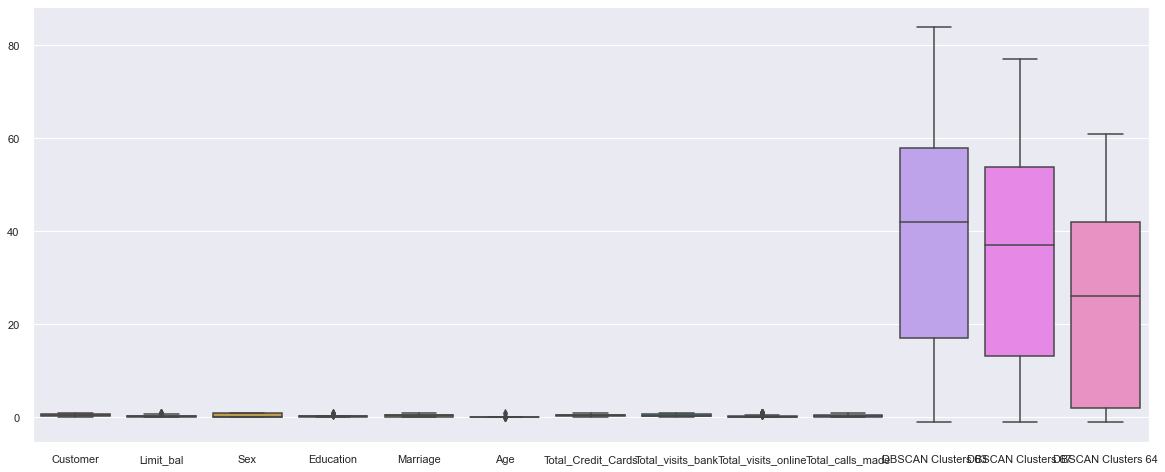

In [113]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_testing_normalized, orient="v")

<AxesSubplot:>

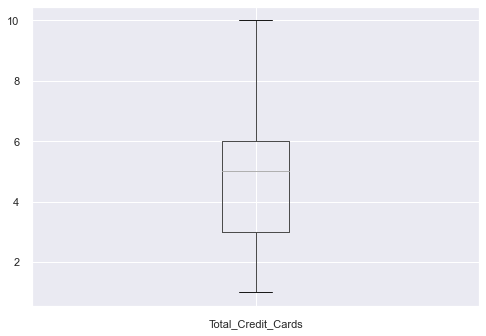

In [97]:
df_testing.boxplot(column=['Total_Credit_Cards'], return_type='axes')

In [117]:
# Create a 3D scatter plot
fig = px.scatter_3d(df_bank, x = df_testing_normalized["Total_Credit_Cards"], y = df_testing_normalized["Total_visits_bank"], z = df_testing_normalized["Total_visits_online"], opacity=1, color_discrete_sequence=['black'], height=900, width=900)

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title="Total Credit Cards",
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title='Total visits bank',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title="Total visits online",
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

         
# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

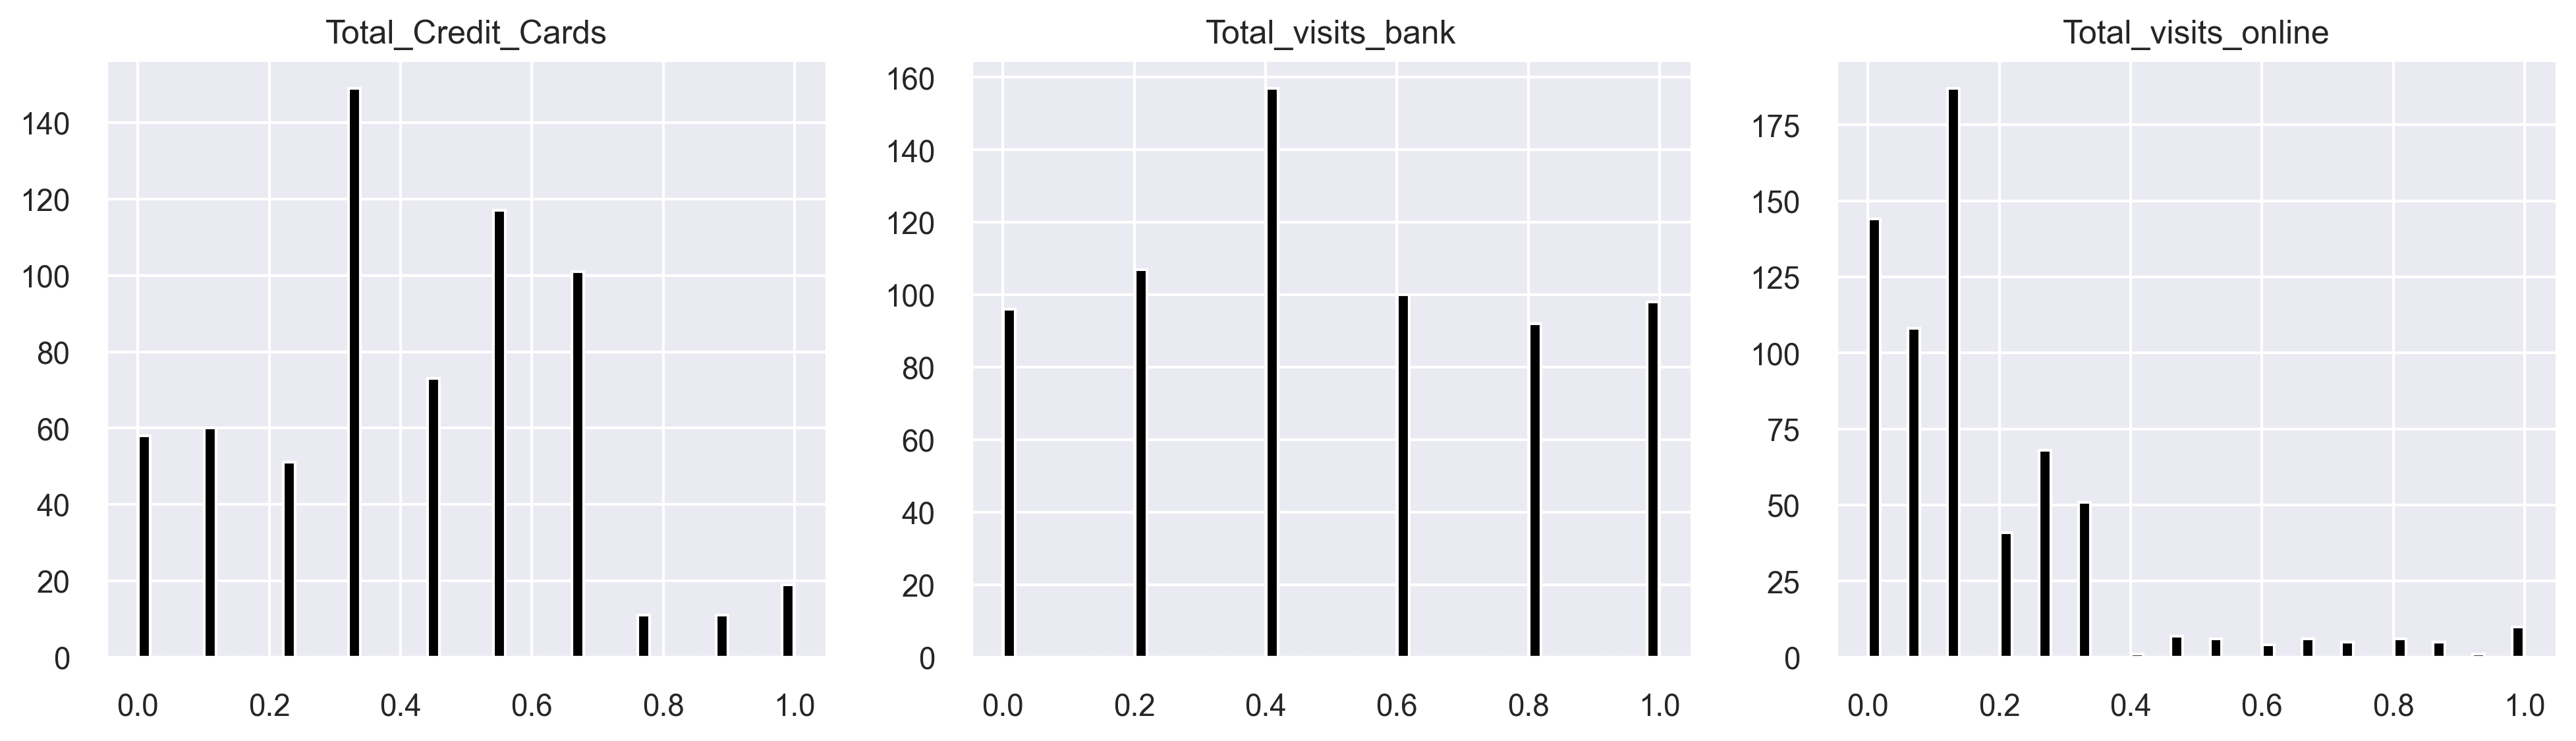

In [100]:
# Select data
X = df_testing_normalized[['Total_Credit_Cards','Total_visits_bank', 'Total_visits_online']]

# Plot distribution charts
fig, axs = plt.subplots(1, 3, figsize=(16,4), dpi=300)
axs[0].hist(X.iloc[:,0], bins=50, color='black', rwidth=0.9)
axs[0].set_title('Total_Credit_Cards')
axs[1].hist(X.iloc[:,1], bins=50, color='black', rwidth=0.9)
axs[1].set_title('Total_visits_bank')
axs[2].hist(X.iloc[:,2], bins=50, color='black', rwidth=0.9)
axs[2].set_title('Total_visits_online')
plt.show()

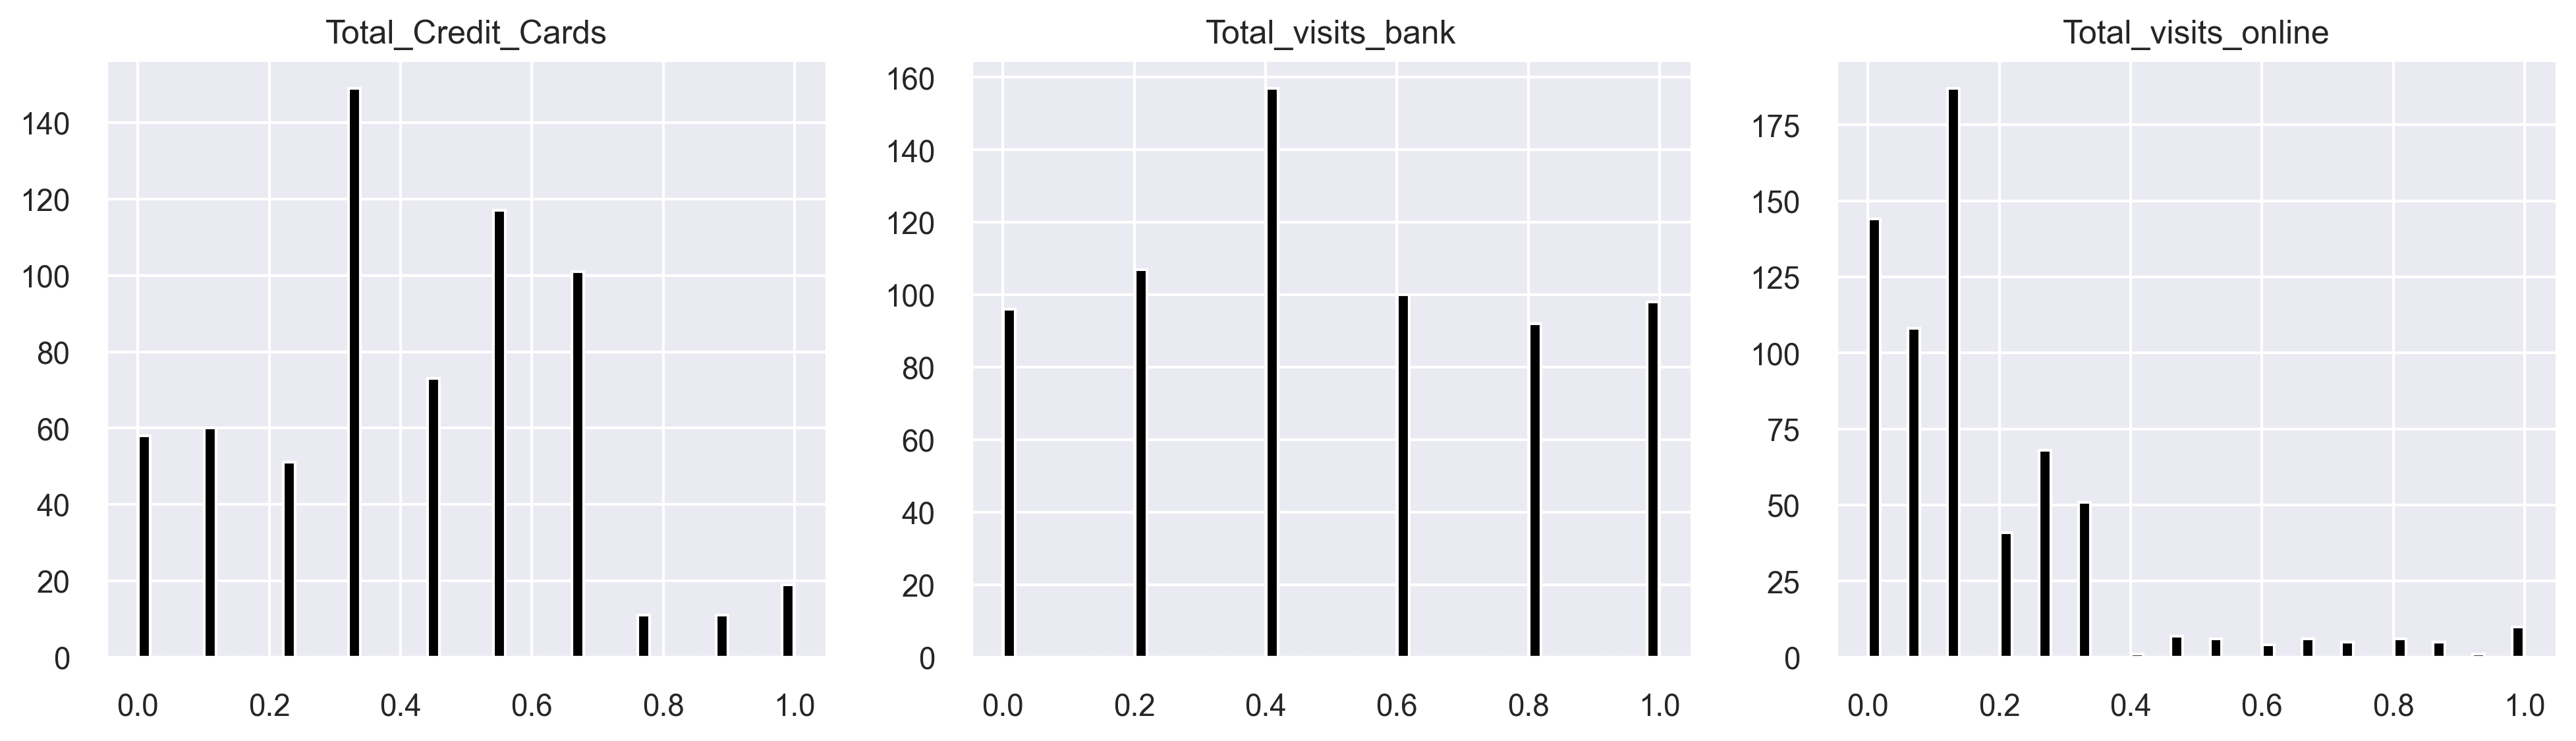

In [101]:
# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Plot distribution charts
fig, axs = plt.subplots(1, 3, figsize=(16,4), dpi=300)
axs[0].hist(X_scaled[:,0], bins=50, color='black', rwidth=0.9)
axs[0].set_title('Total_Credit_Cards')
axs[1].hist(X_scaled[:,1], bins=50, color='black', rwidth=0.9)
axs[1].set_title('Total_visits_bank')
axs[2].hist(X_scaled[:,2], bins=50, color='black', rwidth=0.9)
axs[2].set_title('Total_visits_online')
plt.show()

<ipython-input-146-1e377b80c146>:27: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.



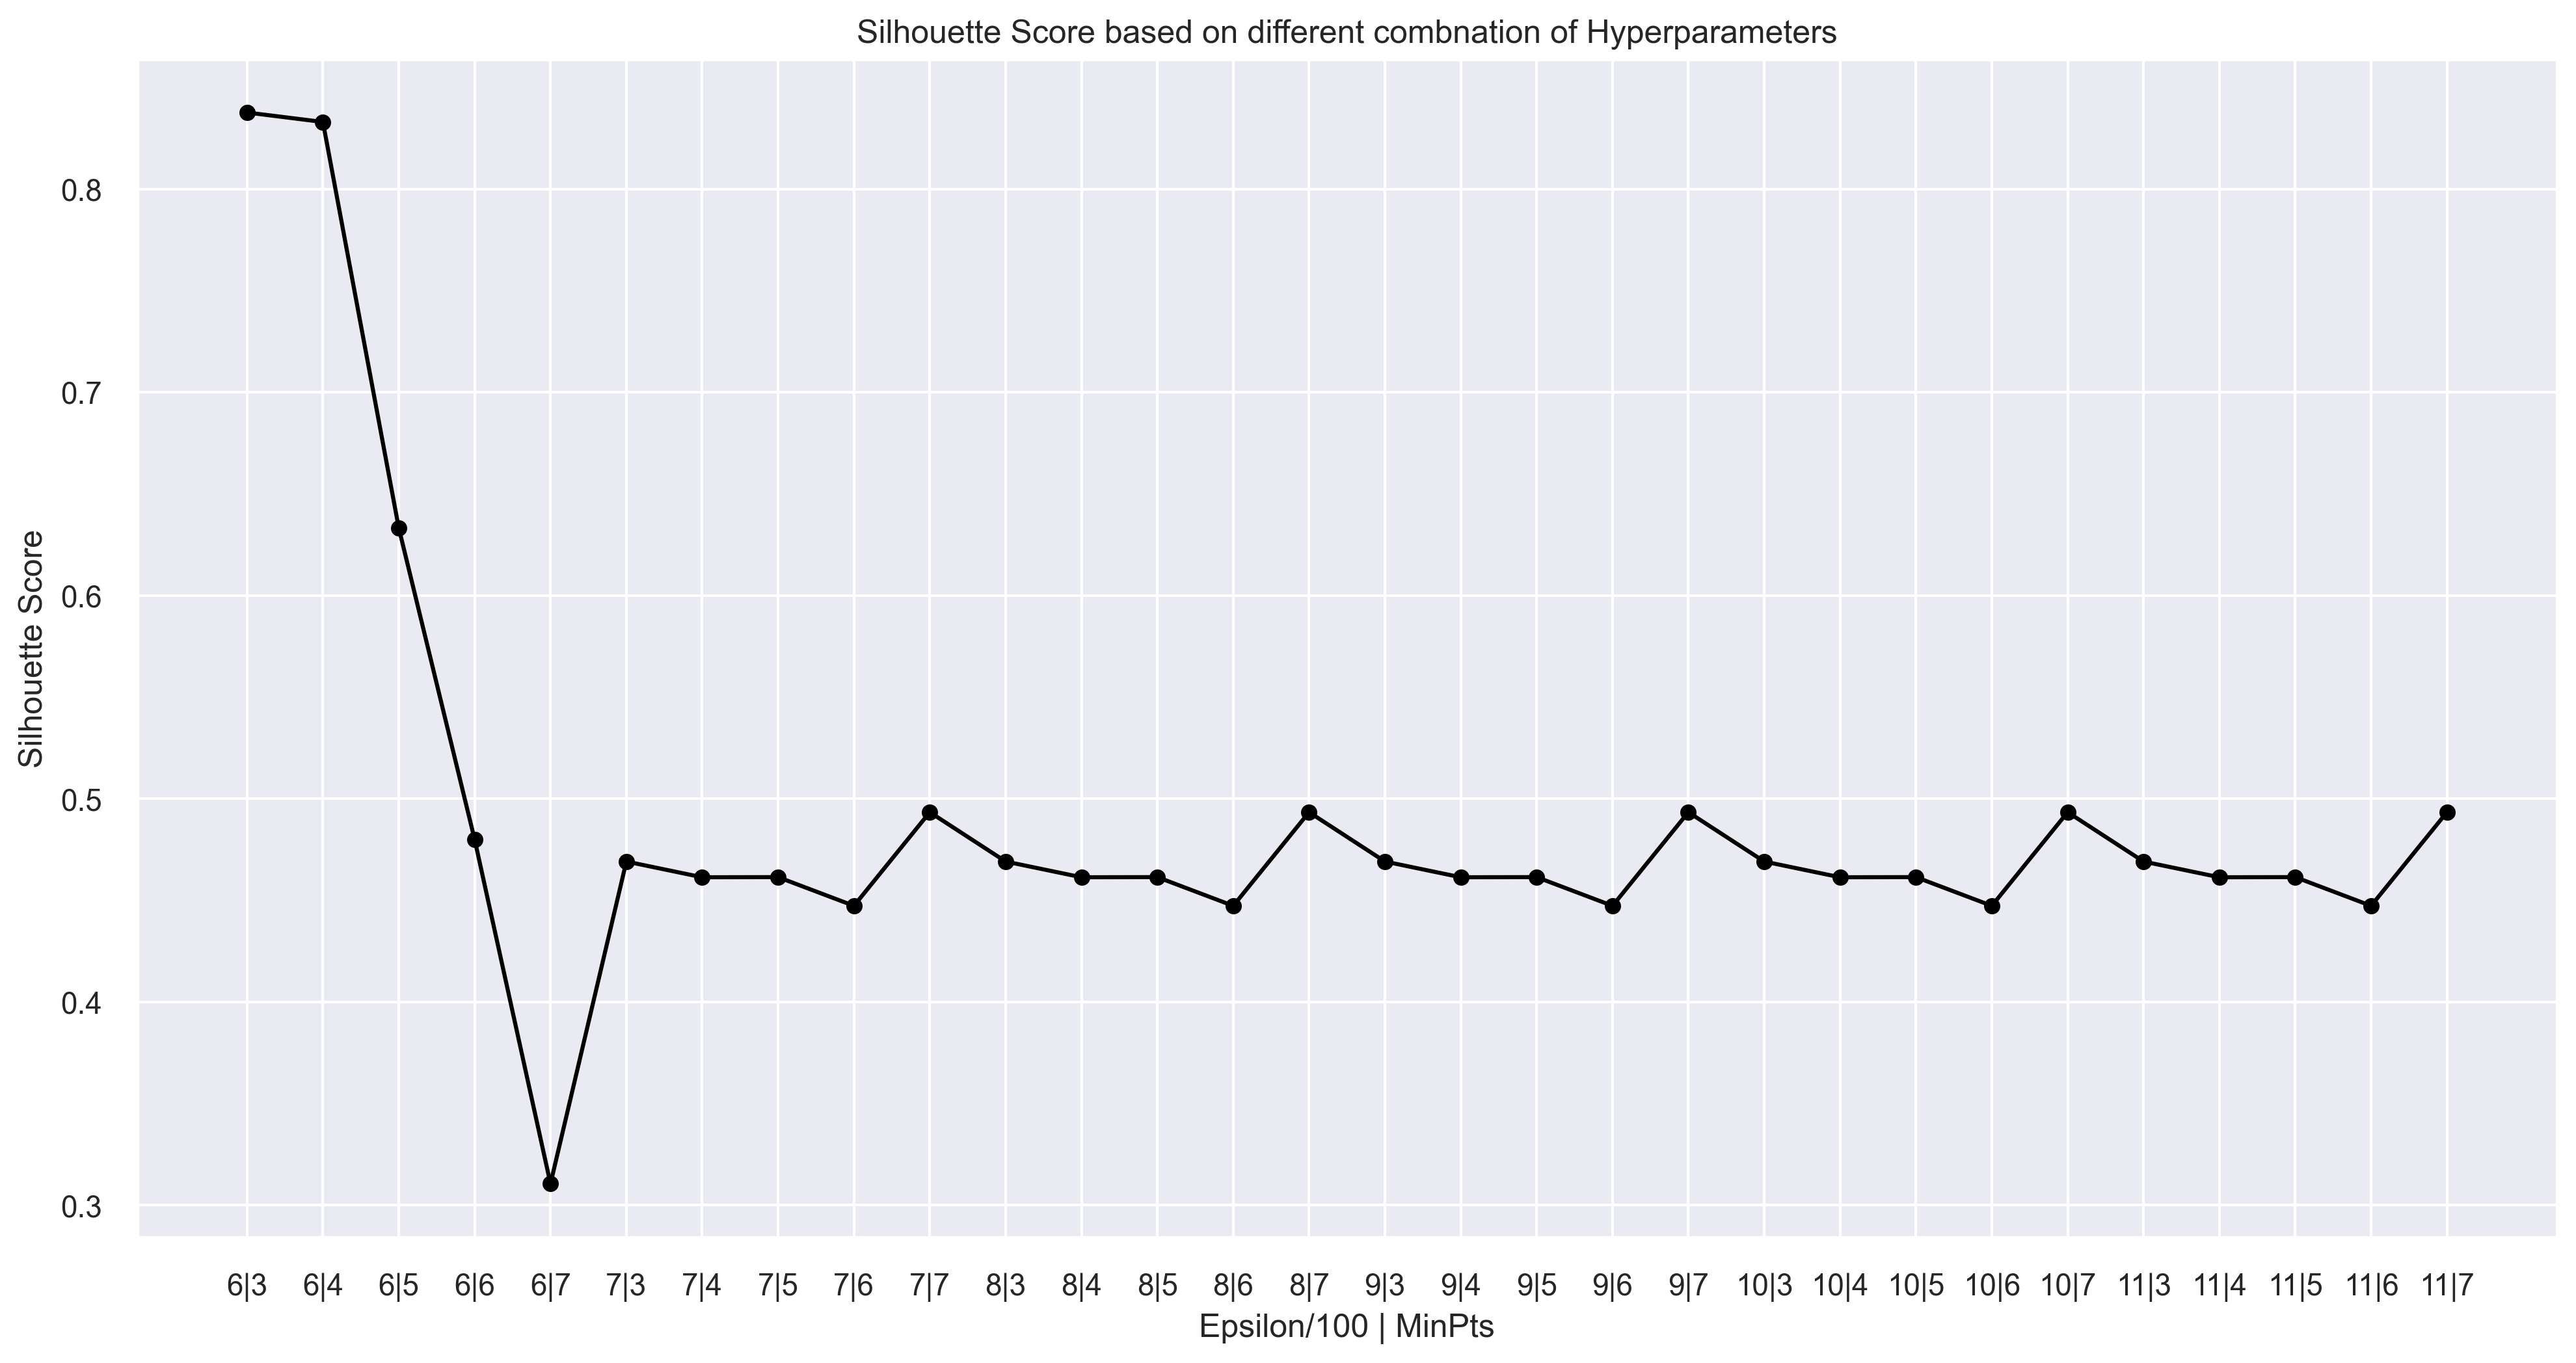

In [146]:
# Create empty lists
S=[] # this is to store Silhouette scores
comb=[] # this is to store combinations of epsilon / min_samples
nc = [] # Storing the number of clusters

# Define ranges to explore
eps_range=range(6,12) # note, we will scale this down by 100 as we want to explore 0.06 - 0.11 range
minpts_range=range(3,8)

for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters
        model = DBSCAN(eps=k/100, min_samples=j)
        # Fit the model 
        clm = model.fit(X)
        # Calculate Silhoutte Score and append to a list
        S.append(metrics.silhouette_score(X, clm.labels_, metric='euclidean'))
        comb.append(str(k)+"|"+str(j)) # axis values for the graph

        # Number of clusters
        (unique, counts) = np.unique(clm.labels_, return_counts=True)
        frequencies = np.asarray((unique, counts)).T
        nc.append(len(frequencies)-1)

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(comb, S, 'bo-', color='black')
plt.xlabel('Epsilon/100 | MinPts')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.show()

<ipython-input-147-3b86df6cb1aa>:3: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.



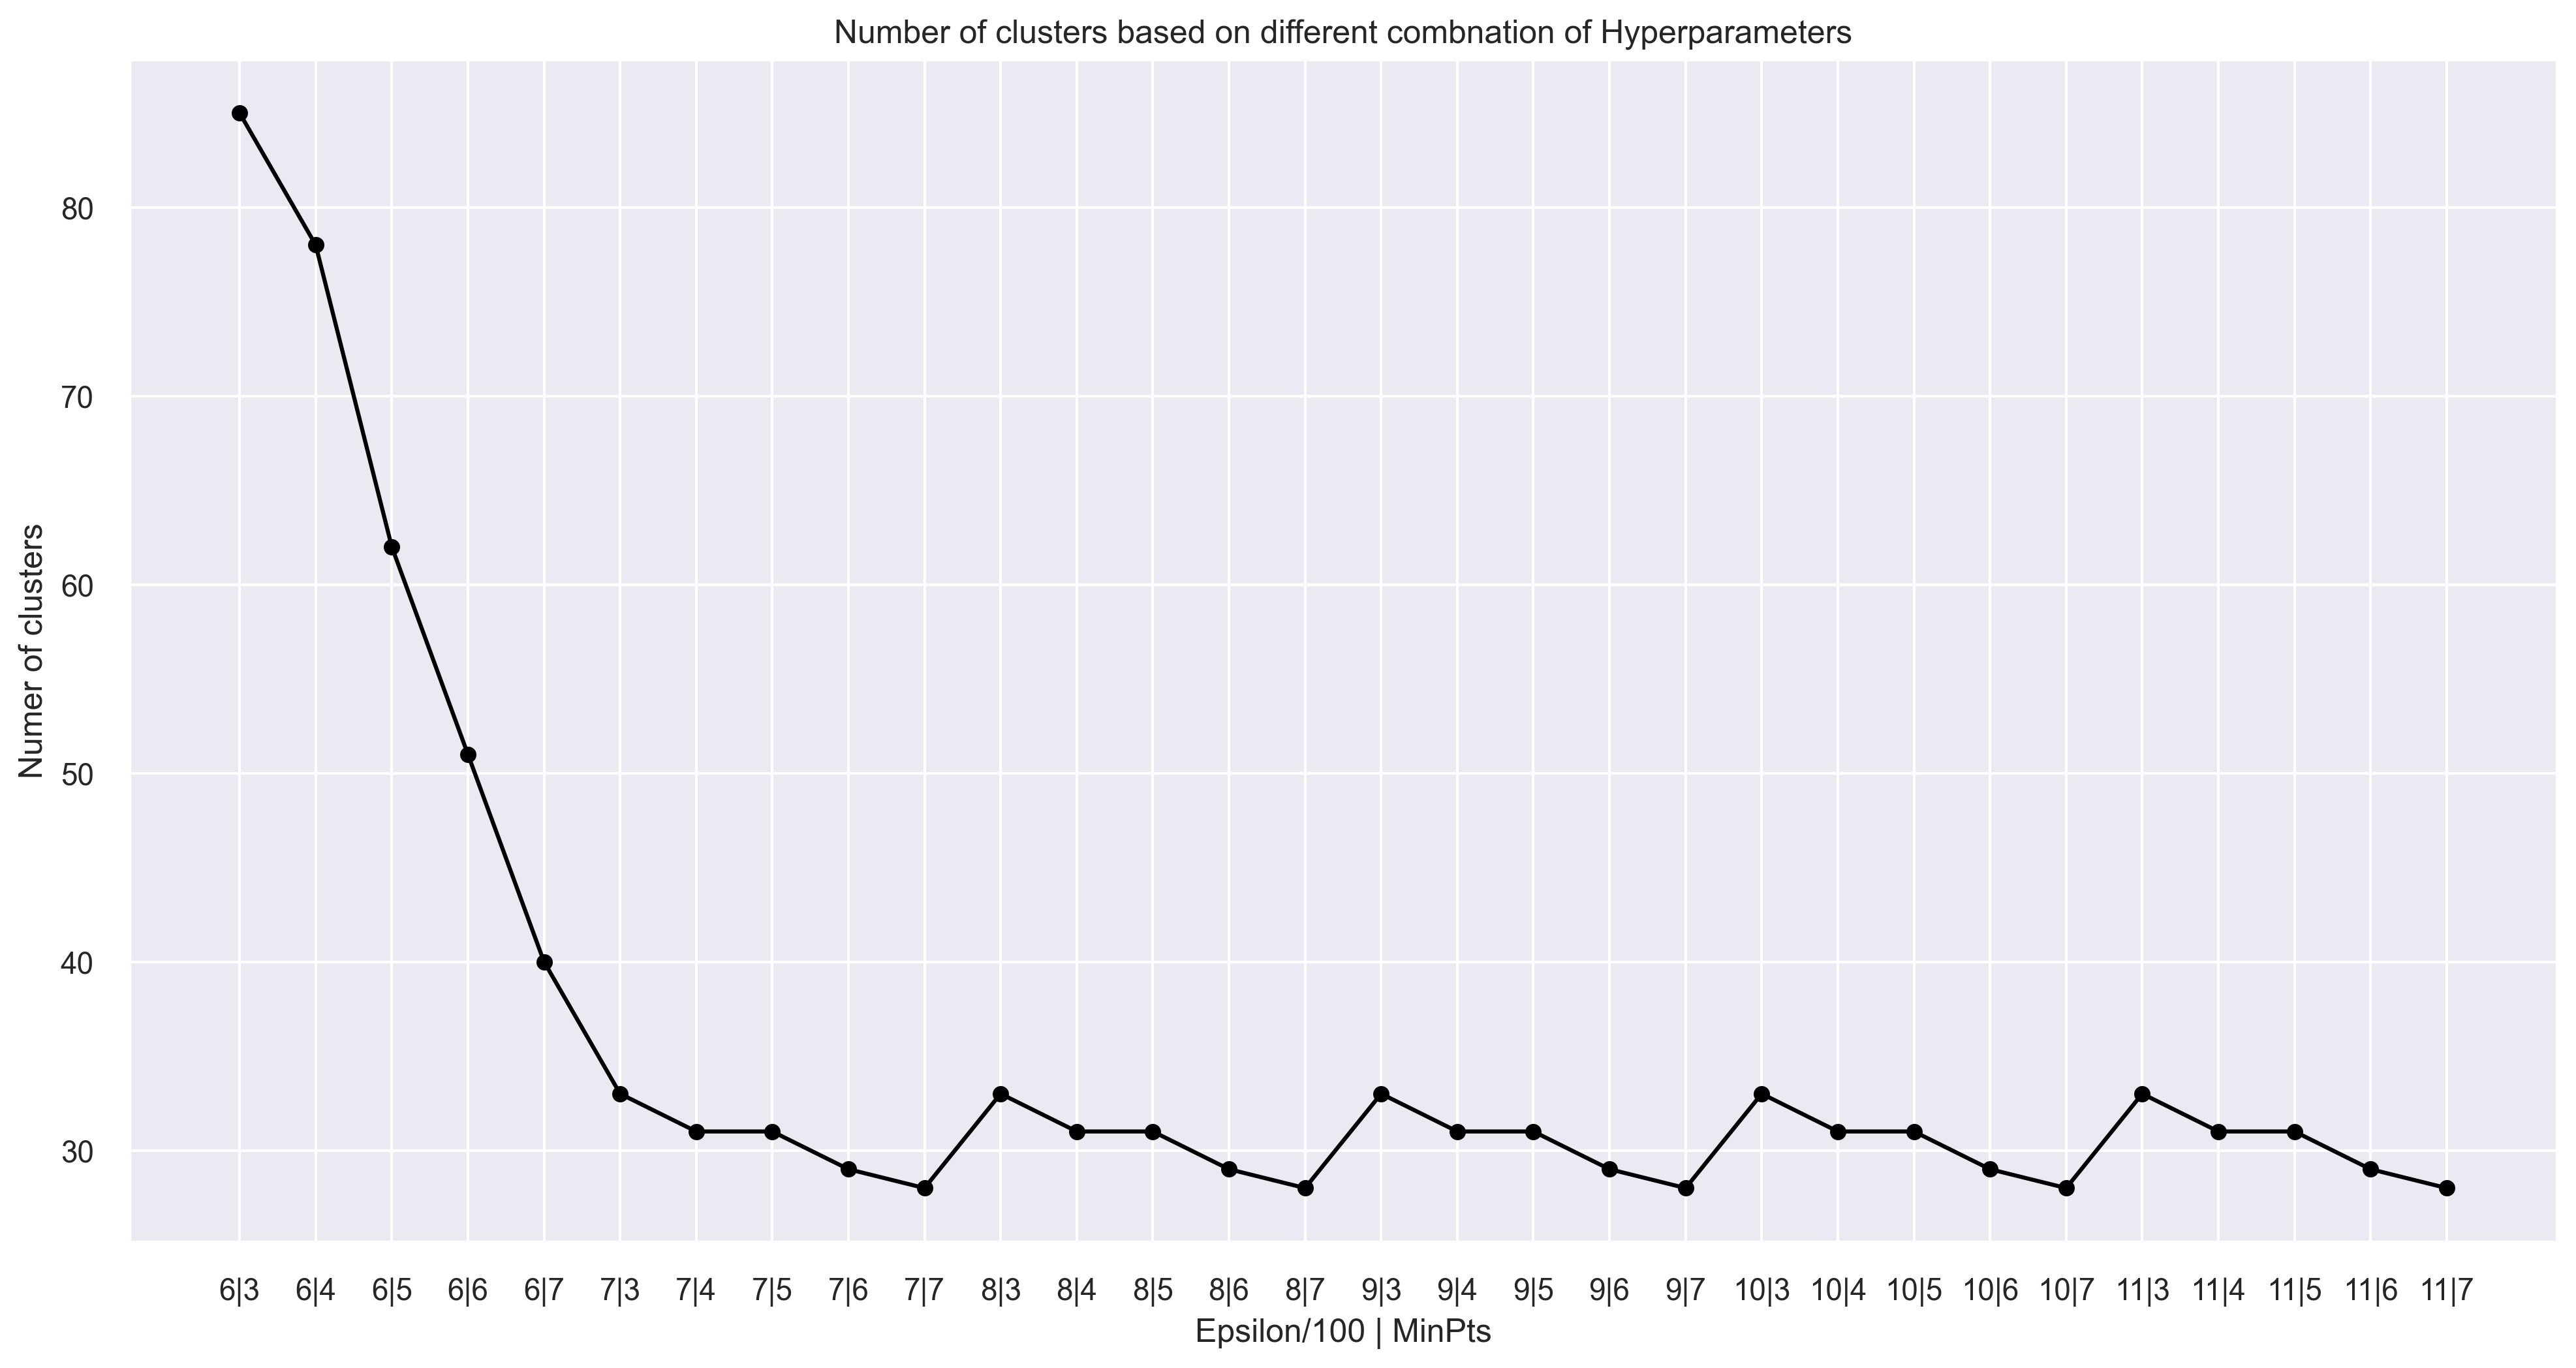

In [147]:
# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(comb, nc, 'bo-', color='black')
plt.xlabel('Epsilon/100 | MinPts')
plt.ylabel('Numer of clusters')
plt.title('Number of clusters based on different combnation of Hyperparameters')
plt.show()

In [127]:
# ------- DBSCAN -------
# Set up model parameters 

# First model: eps=0.08, MinPts=3
model63 = DBSCAN(eps=0.06, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=3, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=None, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Second model: eps=0.06, MinPts=6
model64 = DBSCAN(eps=0.06, min_samples=4) # note, as above this uses default value for other parameters
model65 = DBSCAN(eps=0.06, min_samples=5) # note, as above this uses default value for other parameters

# Fit the models
clm63 = model63.fit(X_scaled)
clm64 = model64.fit(X_scaled)
clm65 = model65.fit(X_scaled)

# Print DBSCAN results
print('*************** DBSCAN Clustering Model ***************')
print("Cluster labels for the first model")
print("Cluster labels for the second model")

*************** DBSCAN Clustering Model ***************
Cluster labels for the first model
[[-1 64]
 [ 0  4]
 [ 1  5]
 [ 2  4]
 [ 3  5]
 [ 4  5]
 [ 5  5]
 [ 6  4]
 [ 7  6]
 [ 8  8]
 [ 9  4]
 [10  9]
 [11  6]
 [12  7]
 [13  6]
 [14  7]
 [15  5]
 [16  5]
 [17  6]
 [18  7]
 [19  4]
 [20  5]
 [21  7]
 [22  6]
 [23  6]
 [24 11]
 [25  8]
 [26  3]
 [27  3]
 [28  4]
 [29  4]
 [30  4]
 [31  3]
 [32  7]
 [33  4]
 [34  6]
 [35  5]
 [36  4]
 [37 14]
 [38  8]
 [39 18]
 [40  9]
 [41  8]
 [42  8]
 [43 11]
 [44 10]
 [45  9]
 [46 12]
 [47  8]
 [48  5]
 [49 10]
 [50 11]
 [51 10]
 [52  7]
 [53  8]
 [54  9]
 [55 17]
 [56 17]
 [57  8]
 [58  5]
 [59  4]
 [60  7]
 [61  6]
 [62  6]
 [63  8]
 [64  8]
 [65 11]
 [66  7]
 [67  5]
 [68  6]
 [69  4]
 [70 11]
 [71  4]
 [72  7]
 [73 13]
 [74  8]
 [75  6]
 [76  4]
 [77 10]
 [78  3]
 [79  7]
 [80  4]
 [81  4]
 [82  3]
 [83  3]
 [84  3]]
86
Cluster labels for the second model


AttributeError: 'numpy.ndarray' object has no attribute 'nunique'

In [119]:
df_testing_normalized['DBSCAN Clusters 63']=clm63.labels_
df_testing_normalized['DBSCAN Clusters 64']=clm64.labels_
df_testing_normalized['DBSCAN Clusters 65']=clm65.labels_
df_testing_normalized

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,DBSCAN Clusters 63,DBSCAN Clusters 67,DBSCAN Clusters 64,DBSCAN Clusters 65
Id,,,,,,,,,,,,,,
1,0.855833,0.016129,0.0,0.2,0.0,0.000082,0.111111,0.2,0.066667,0.0,-1,-1,-1,-1
626,0.102418,0.016129,0.0,0.2,0.5,0.000082,0.777778,0.2,0.400000,0.1,-1,-1,-1,-1
625,0.971121,0.129032,0.0,0.0,0.5,0.000082,0.666667,0.0,0.733333,0.0,-1,-1,-1,-1
624,0.240681,0.564516,0.0,0.2,0.0,0.000436,1.000000,0.0,0.466667,0.0,-1,-1,-1,-1
622,0.823308,0.274194,0.0,0.2,0.5,0.000191,0.888889,0.2,0.800000,0.2,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,0.235295,0.225806,0.0,0.2,0.0,0.000490,1.000000,0.0,1.000000,0.1,-1,-1,-1,-1
654,0.457913,0.709677,0.0,0.0,0.0,0.000572,1.000000,0.0,1.000000,0.1,-1,-1,-1,-1
645,0.081894,0.032258,0.0,0.2,0.0,0.000272,1.000000,0.2,1.000000,0.1,-1,-1,-1,-1


In [120]:
# Sort the dataframe so clusters in the legend follow the number order
df_testing_normalized=df_testing_normalized.sort_values(by=['DBSCAN Clusters 65'])

# Create a 3D scatter plot
fig = px.scatter_3d(df_testing_normalized, x = df_testing_normalized["Total_Credit_Cards"], y = df_testing_normalized["Total_visits_bank"], z = df_testing_normalized["Total_visits_online"], 
                    opacity=1, color=df_testing_normalized['DBSCAN Clusters 65'].astype(str), 
                    color_discrete_sequence=['black']+px.colors.qualitative.Plotly,
                    width=900, height=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=0.04, xanchor="left", x=0.1),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))
# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

In [109]:
silhoutte_value = metrics.silhouette_score(X_scaled, model65.labels_, metric='euclidean')
silhoutte_value 


0.6332043486256013

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


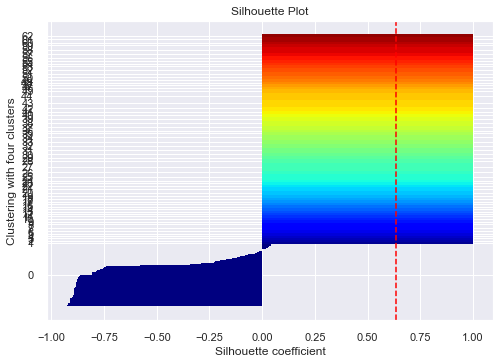

In [112]:
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

plot_silhouette(data = X_scaled, 
                labels = model65.labels_, 
                ylabel = 'Clustering with four clusters')